In [2]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import datetime as datetime
import pickle

In [3]:
with open('lending_club_wrangling_pick.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [4]:
df.shape

(2260668, 108)

Can we identify any numerical values as categorical data?

In [12]:
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('<M8[ns]')], dtype=object)

In [78]:
[column for column in df.select_dtypes('number').columns if len(pd.Series(df[column].unique()).sort_values(ascending = True)) < 10]

['policy_code', 'num_tl_120dpd_2m', 'num_tl_30dpd']

In [88]:
print(df['policy_code'].unique())
print(df['num_tl_120dpd_2m'].unique())
print(df['num_tl_30dpd'].unique())

[1.]
[ 0. nan  1.  2.  6.  3.  7.  4.]
[ 0.  1.  2.  4.  3. nan]


There may be 3 potential categorical variables with few unique numeric values

How are the loan types distributed by state i.e. defaulted vs non defaulted?

In [90]:
df.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m'

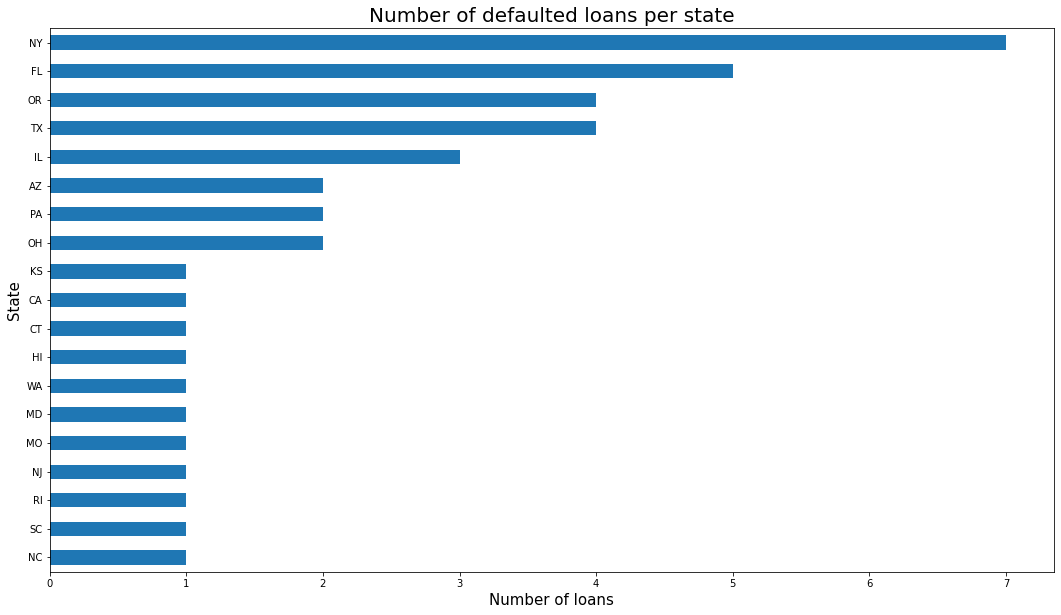

In [106]:
fig = plt.figure(figsize=(18,10))
df[df['loan_status']== 'Default'].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

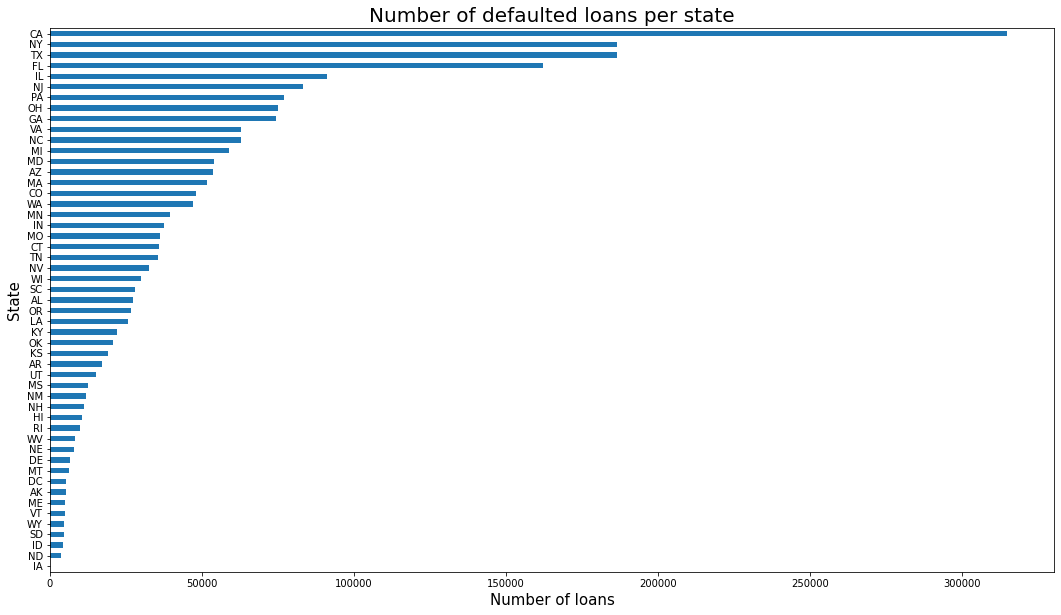

In [107]:
fig = plt.figure(figsize=(18,10))
df[df['loan_status'] != 'Default'].groupby('addr_state')['loan_status'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

New York has the highest number of defaulted loans and the second highest number of loans, calfornia has the highest number loans

More number of loans from same states w/ defaulted loans. State can't be a good feature because of class imbalance

How does the distribution of loan amounts differentiated by terms?

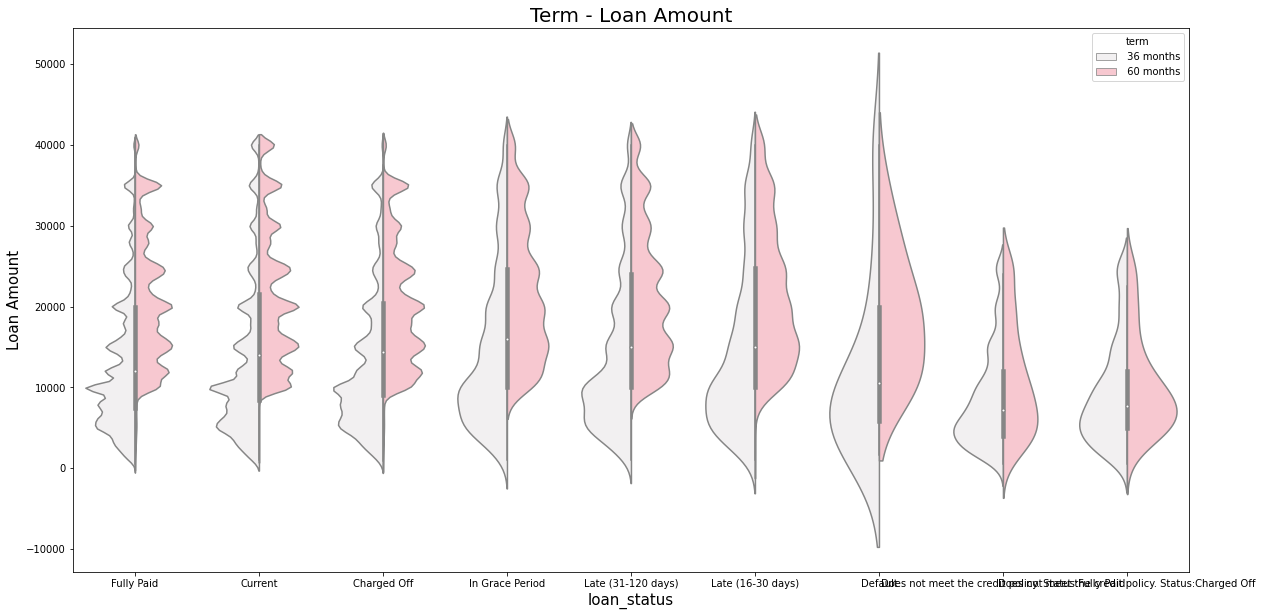

In [110]:
fig = plt.figure(figsize=(20,10))
sns.violinplot(x="loan_status",y="loan_amnt",data=df, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("loan_status", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Shorter term 36 mo, often has a smaller loan amount

How is are defaulted loans correlated with the other features?

In [112]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    2260628
1         40
Name: TARGET, dtype: int64

In [113]:
corr = df.corr()['TARGET'].sort_values()

In [124]:
corr.head(50)

last_fico_range_high             -0.005695
last_fico_range_low              -0.003901
mths_since_last_record           -0.002728
total_rec_prncp                  -0.002390
mths_since_recent_bc_dlq         -0.002141
last_pymnt_amnt                  -0.001899
mo_sin_old_il_acct               -0.001896
mths_since_recent_revol_delinq   -0.001670
total_pymnt                      -0.001595
total_pymnt_inv                  -0.001588
bc_util                          -0.001277
max_bal_bc                       -0.001171
revol_util                       -0.001148
percent_bc_gt_75                 -0.001119
revol_bal                        -0.001047
mths_since_recent_inq            -0.001007
mo_sin_old_rev_tl_op             -0.000959
mths_since_rcnt_il               -0.000903
num_accts_ever_120_pd            -0.000871
num_rev_accts                    -0.000813
total_acc                        -0.000811
recoveries                       -0.000809
mort_acc                         -0.000794
collection_

In [123]:
corr.tail(50)

open_act_il                   -0.000349
inq_fi                        -0.000322
loan_amnt                     -0.000319
funded_amnt                   -0.000316
funded_amnt_inv               -0.000308
avg_cur_bal                   -0.000307
total_cu_tl                   -0.000264
acc_now_delinq                -0.000251
num_sats                      -0.000248
mo_sin_rcnt_tl                -0.000231
num_il_tl                     -0.000226
open_acc                      -0.000214
num_tl_30dpd                  -0.000214
bc_open_to_buy                -0.000207
open_acc_6m                   -0.000182
num_bc_sats                   -0.000174
annual_inc                    -0.000142
installment                   -0.000108
num_tl_120dpd_2m              -0.000100
total_il_high_credit_limit    -0.000077
delinq_amnt                   -0.000072
num_actv_bc_tl                -0.000048
tot_coll_amt                  -0.000036
open_rv_12m                   -0.000002
mths_since_recent_bc           0.000027


Apart from the perfect correlation with itself, features like total_rec_late_fee is assumed to be higher if a borrower doesn't pay back the loan so int_rate and outstanding principle look relevant since high interest rate means it's harder to pay back the loan, total payment obviously has a negative correlation because it means they've paid back most of it

In [126]:
df.corr()['dti'].sort_values().tail(20)

percent_bc_gt_75              0.104026
num_actv_bc_tl                0.110074
revol_util                    0.115225
num_op_rev_tl                 0.116192
bc_util                       0.117817
all_util                      0.123927
int_rate                      0.124491
open_il_24m                   0.137828
open_act_il                   0.142859
num_il_tl                     0.144664
total_acc                     0.147335
total_bal_il                  0.155238
num_actv_rev_tl               0.158904
num_rev_tl_bal_gt_0           0.161222
num_sats                      0.182268
open_acc                      0.186124
total_bal_ex_mort             0.193932
total_il_high_credit_limit    0.219502
dti                           1.000000
policy_code                        NaN
Name: dti, dtype: float64

In [136]:
df.corr()['annual_inc'].sort_values().tail(20)

total_bal_il                  0.121896
mort_acc                      0.134760
total_rec_prncp               0.139057
total_pymnt_inv               0.140296
total_pymnt                   0.140322
max_bal_bc                    0.157063
total_il_high_credit_limit    0.175138
total_bc_limit                0.177571
total_rev_hi_lim              0.185251
avg_cur_bal                   0.190019
installment                   0.190270
revol_bal                     0.190760
funded_amnt_inv               0.197025
funded_amnt                   0.197207
loan_amnt                     0.197246
total_bal_ex_mort             0.207235
tot_cur_bal                   0.253527
tot_hi_cred_lim               0.264642
annual_inc                    1.000000
policy_code                        NaN
Name: annual_inc, dtype: float64

How are loans distributed by employment length?

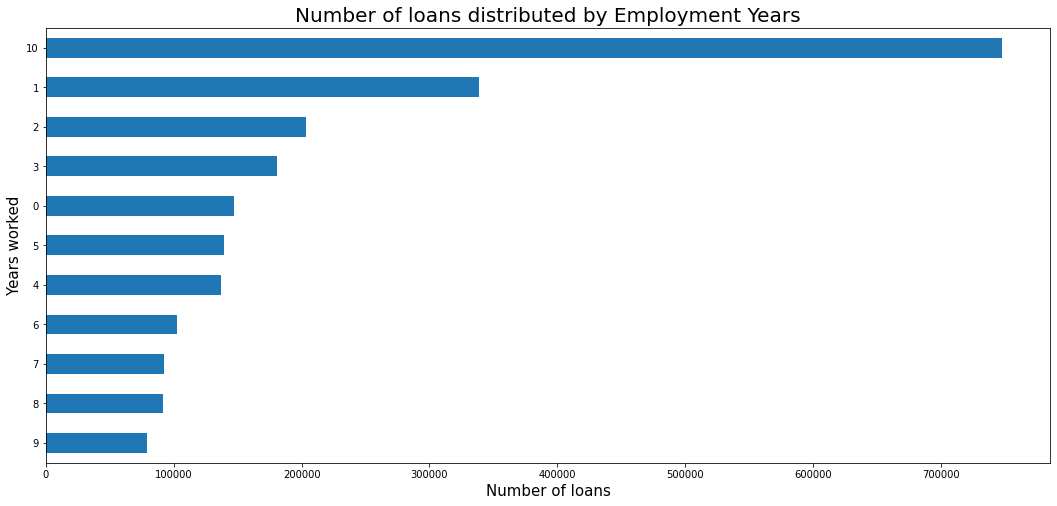

In [127]:
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

Individuals with 10+ years of employment have taken out more loans

Pandas Profiling Report

In [131]:
profile = ProfileReport(df, minimal=True)
profile.to_file("output.html")

In [134]:
profile

<!-- What does the distribution of interest rates look like -->

What does the distribution of interest rates look like using a kernel density estimation plot?

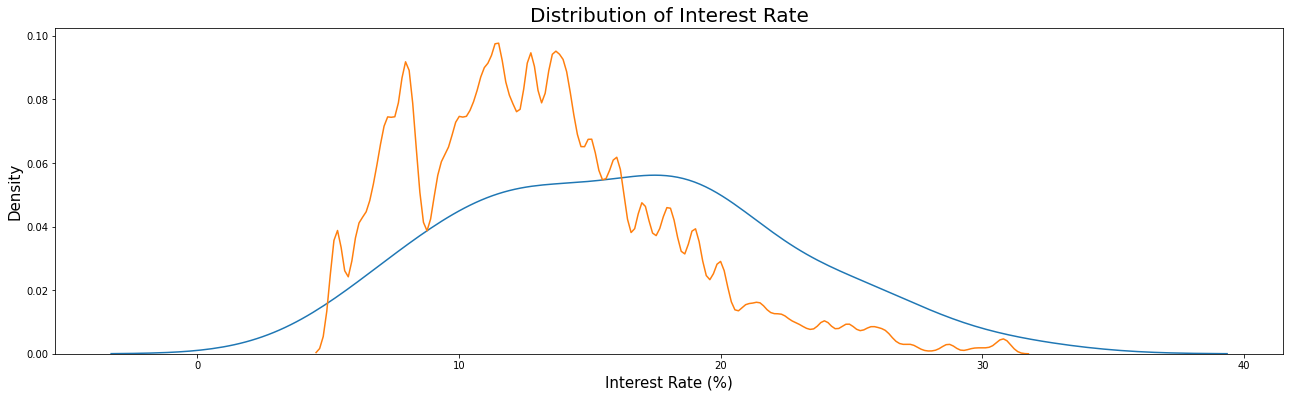

In [135]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);